   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  class
0   1  10   1  11   1  13   1  12   1   1      9
1   2  11   2  13   2  10   2  12   2   1      9
2   3  12   3  11   3  13   3  10   3   1      9
3   4  10   4  11   4   1   4  13   4  12      9
4   4   1   4  13   4  12   4  11   4  10      9
Accuracy: 0.5101959216313474

Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68      2552
           1       0.00      0.00      0.00      2075
           2       0.00      0.00      0.00       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

    accuracy                           0.51      5002
   macro avg       0.06      0.12      0.08      5002
weighted avg       0.26      0.51      0.34      5002




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


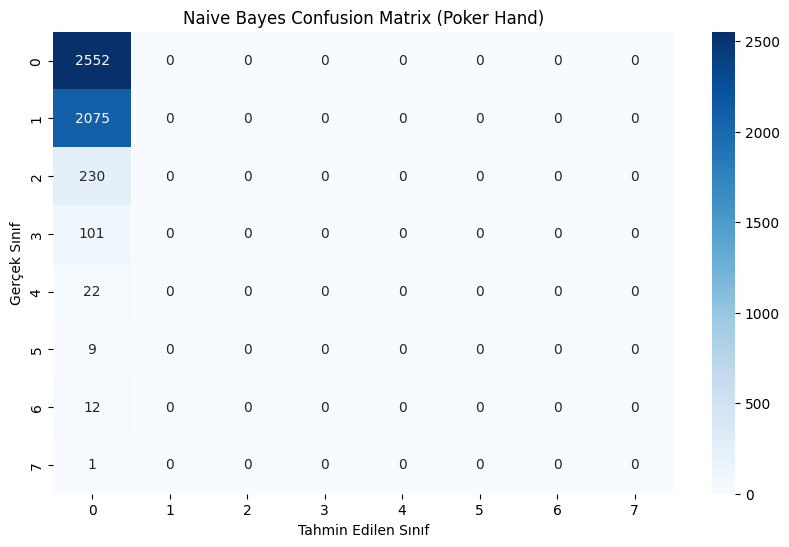

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-18-14916a021f6d>:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


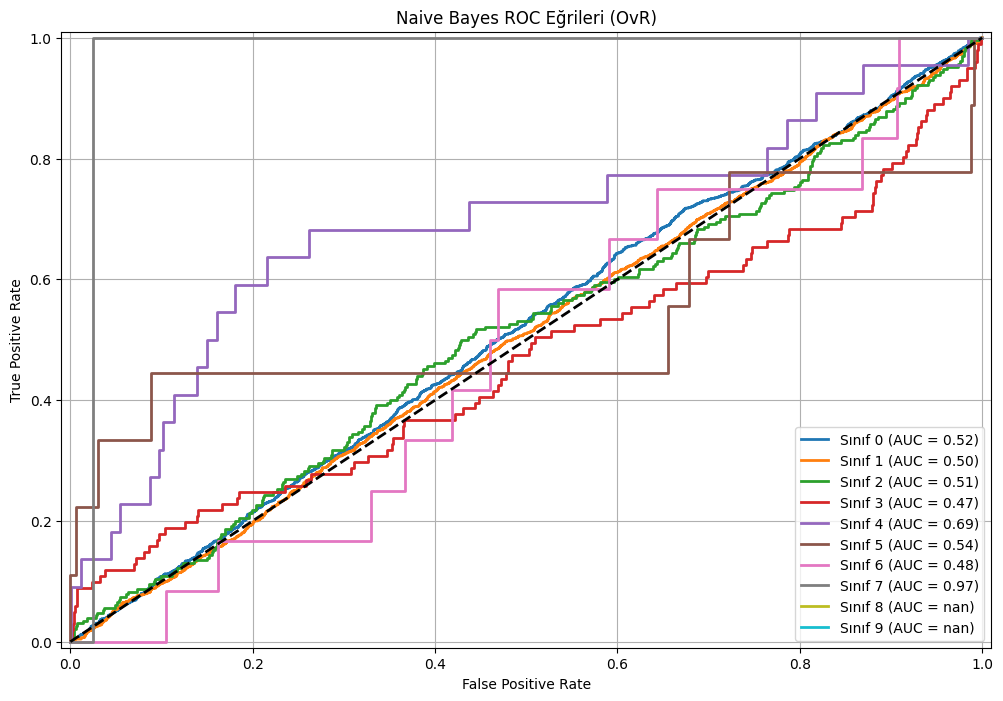

In [18]:
# 🔧 Gerekli kütüphaneler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Veri kümesini indir ve sütunları tanımla
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
df = pd.read_csv(url, header=None, names=columns)

# 👁 Veri setine göz at
print(df.head())

# 🎯 Girdi ve hedef değişkenleri ayır
X = df.drop("class", axis=1)
y = df["class"]

# 🔀 Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Naive Bayes modelini eğit (GaussianNB)
model = GaussianNB()
model.fit(X_train, y_train)

# 🔎 Test verisiyle tahmin yap
y_pred = model.predict(X_test)

# ✅ Performans metriklerini yazdır
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📊 Confusion Matrix görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix (Poker Hand)")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.show()

# 12. 🎯 ROC Eğrisi Ekleniyor
# Sınıfları ikili hale getirelim (One-vs-Rest)
n_classes = 10
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_proba = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Her sınıf için ROC eğrisini çiz
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tüm sınıflar için ROC çizimi
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Sınıf {i} (AUC = {roc_auc[i]:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Eğrileri (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


🔍 Orijinal Sınıf Dağılımı:
 class
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        5
Name: count, dtype: int64

✅ Dengelenmiş Sınıf Dağılımı:
 class
0    12493
1    12493
2    12493
3    12493
4    12493
5    12493
6    12493
7    12493
8    12493
9    12493
Name: count, dtype: int64

🎯 Doğruluk: 0.5429040262547027

📄 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.23      0.07      0.11      2525
           1       0.20      0.09      0.12      2484
           2       0.28      0.17      0.21      2544
           3       0.27      0.25      0.26      2517
           4       0.37      0.58      0.45      2503
           5       0.41      0.61      0.49      2519
           6       0.42      0.68      0.52      2440
           7       0.97      1.00      0.99      2509
           8       0.98      1.00      0.99      2489
           9       0.97      1.00      0.98      2456

  

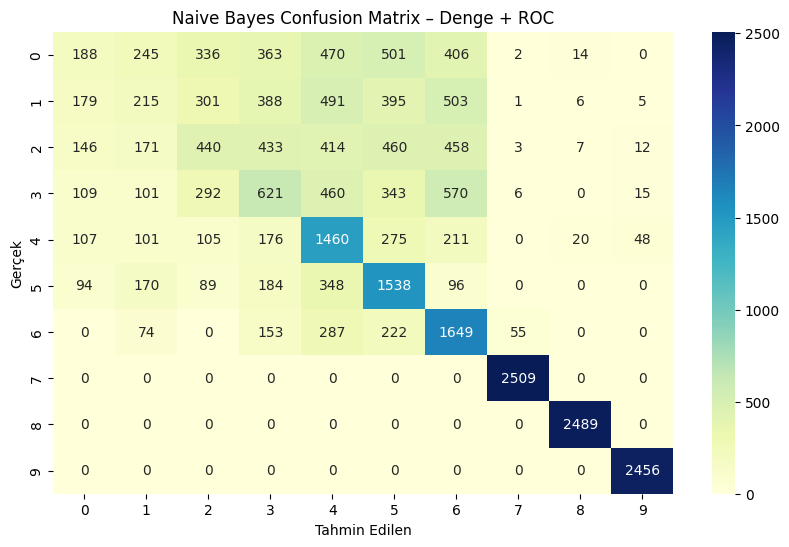

<ipython-input-17-fb15b5c8ab99>:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


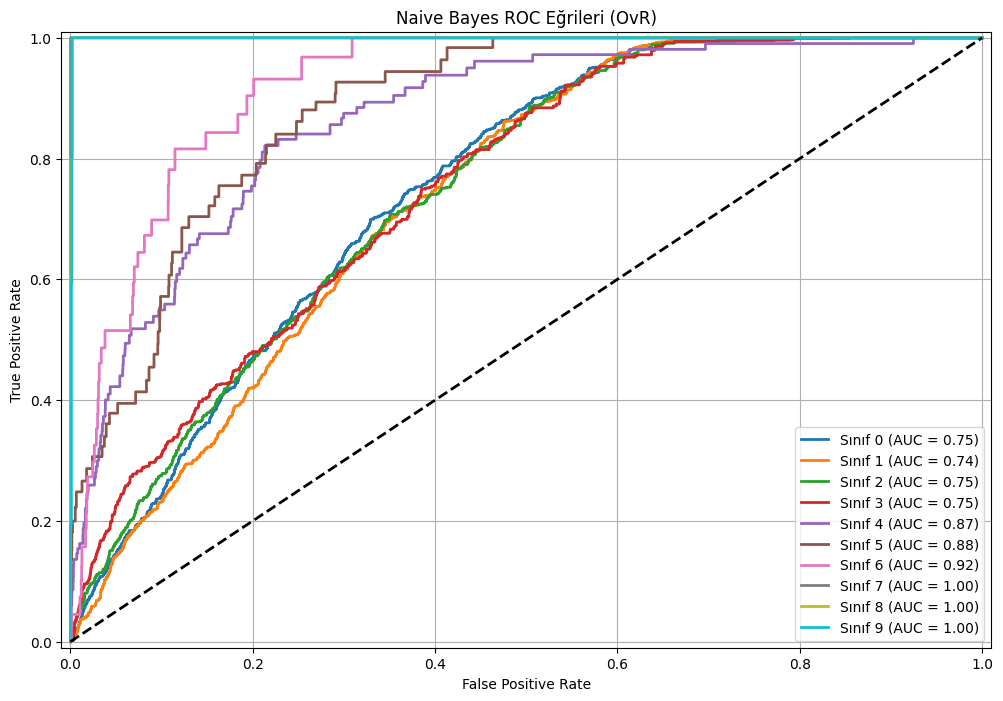

In [17]:
# 1. Gerekli kütüphaneleri yükle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Veriyi indir ve sütunları adlandır
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
df = pd.read_csv(url, header=None, names=columns)

# 3. Orijinal class dağılımı
print("🔍 Orijinal Sınıf Dağılımı:\n", df["class"].value_counts())

# 4. Dengeleme (Upsampling)
class_groups = [df[df["class"] == i] for i in range(10)]
max_size = max([len(g) for g in class_groups])
upsampled = [resample(g, replace=True, n_samples=max_size, random_state=42) if len(g) < max_size else g for g in class_groups]
df_balanced = pd.concat(upsampled)

# 5. Yeni class dağılımı
print("\n✅ Dengelenmiş Sınıf Dağılımı:\n", df_balanced["class"].value_counts())

# 6. Giriş ve hedef değişkenleri ayır
X = df_balanced.drop("class", axis=1)
y = df_balanced["class"]

# 7. Eğitim ve test verilerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Modeli tanımla ve eğit
model = CategoricalNB()
model.fit(X_train, y_train)

# 9. Tahmin yap
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 10. Performans ölçümleri
print("\n🎯 Doğruluk:", accuracy_score(y_test, y_pred))
print("\n📄 Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 11. Confusion Matrix görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Naive Bayes Confusion Matrix – Denge + ROC")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# 12. 🎯 ROC Eğrileri
n_classes = 10
y_test_bin = label_binarize(y_test, classes=range(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tüm sınıflar için ROC çizimi
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Sınıf {i} (AUC = {roc_auc[i]:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Eğrileri (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
